In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import functools
import seaborn as sns




In [2]:
# Data file paths
alcohol_path = "data (1).csv"
happiness_path = "2018.csv"
hdi_path = "2018 Human Development Index (HDI).csv"
gdp_path = "GDP per capita (2017 PPP $).csv"
life_path = "Life expectancy at birth (years).csv"

# Output file
output_data_file = "output_data/alcohol_vs_happiness.csv"

# Read the data files
alcohol_data = pd.read_csv(alcohol_path)
happiness_data = pd.read_csv(happiness_path)
hdi_data = pd.read_csv(hdi_path, skiprows=5, encoding="cp1252")
gdp_data = pd.read_csv(gdp_path, encoding="cp1252", skiprows=5)
life_data = pd.read_csv(life_path, encoding="cp1252", skiprows=6)


In [3]:
# Grab 2018 data, clean and merge HDI, GDP and Life Expectancy 
clean_gdp_data = gdp_data[["Country", "2018"]]
gdp_hdi = clean_gdp_data.merge(hdi_data, how='inner', on=["Country"])
final_gdp_hdi = gdp_hdi.rename(columns={"2018_x": "GDP (per capita PPP)", "2018_y": "HDI"})
clean_life_data = life_data[["Country", "2018"]]
clean_life_data = clean_life_data.rename(columns={"2018": "Life Expectancy"})
final_hdi_gdp_life = final_gdp_hdi.merge(clean_life_data, how='inner', on=["Country"])
#final_hdi_gdp_life = final_hdi_gdp_life.dropna()
final_hdi_gdp_life = final_hdi_gdp_life.iloc[:-25]
final_hdi_gdp_life.dtypes

Country                 object
GDP (per capita PPP)    object
HDI Rank                object
HDI                     object
Life Expectancy         object
dtype: object

In [4]:
final_hdi_gdp_life[["GDP (per capita PPP)", "HDI Rank", "HDI", "Life Expectancy"]] = final_hdi_gdp_life[["GDP (per capita PPP)", "HDI Rank", "HDI", "Life Expectancy"]].astype(float)
final_hdi_gdp_life.dtypes


Country                  object
GDP (per capita PPP)    float64
HDI Rank                float64
HDI                     float64
Life Expectancy         float64
dtype: object

In [5]:
final_hdi_gdp_life = final_hdi_gdp_life.sort_values(by='GDP (per capita PPP)', ascending=False)

final_hdi_gdp_life["Country"] = final_hdi_gdp_life["Country"].str.strip()
final_hdi_gdp_life

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy
97,Luxembourg,114110.0,23.0,0.913,82.1
149,Singapore,97745.0,11.0,0.936,83.5
135,Qatar,94503.0,45.0,0.845,80.1
78,Ireland,83471.0,2.0,0.951,82.1
159,Switzerland,68479.0,2.0,0.955,83.6
...,...,...,...,...,...
120,Niger,1196.0,189.0,0.391,62.0
38,Congo (Democratic Republic of the),1086.0,175.0,0.478,60.4
99,Malawi,1043.0,174.0,0.478,63.8
31,Central African Republic,933.0,188.0,0.395,52.8


In [6]:
top_hdi = final_hdi_gdp_life.sort_values(by='Country', ascending=False)
top_hdi.head(50)

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy
180,Zimbabwe,3130.0,150.0,0.569,61.2
179,Zambia,3522.0,146.0,0.582,63.5
178,Viet Nam,7586.0,117.0,0.700,75.3
177,Vanuatu,3130.0,140.0,0.603,70.3
176,Uzbekistan,6755.0,106.0,0.717,71.6
175,Uruguay,21591.0,55.0,0.816,77.8
174,United States,61544.0,17.0,0.925,78.9
173,United Kingdom,46310.0,13.0,0.928,81.2
172,United Arab Emirates,66968.0,31.0,0.889,77.8
171,Ukraine,12338.0,74.0,0.774,72.0


In [7]:
# Clean World Happiness Report
happiness_final = happiness_data.rename(columns={"Country or region": "Country"})
happiness_final['Country'] = happiness_final['Country'].replace({"Russia": "Russian Federation"})
#"Congo (Brazzaville)":"Congo","Congo (Kinshasa)": "Congo (Democratic Republic of the)","Tanzania": "Tanzania (United Republic of)"
happiness_final

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [8]:
top_happ = happiness_final.sort_values(by='Country', ascending=True)
top_happ.head(50)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
144,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
111,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
83,84,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135
141,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061
28,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
128,129,Armenia,4.321,0.816,0.990,0.666,0.260,0.077,0.028
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302
11,12,Austria,7.139,1.341,1.504,0.891,0.617,0.242,0.224
86,87,Azerbaijan,5.201,1.024,1.161,0.603,0.430,0.031,0.176
42,43,Bahrain,6.105,1.338,1.366,0.698,0.594,0.243,0.123


In [62]:
alcohol_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)"
1,Afghanistan,Data source,All types,0.01
2,Afghanistan,Data source,Beer,0.00
3,Afghanistan,Data source,Wine,0.00
4,Afghanistan,Data source,Spirits,0.01
5,Afghanistan,Data source,Other alcoholic beverages,0.00
...,...,...,...,...
936,Zimbabwe,Data source,All types,3.46
937,Zimbabwe,Data source,Beer,1.93
938,Zimbabwe,Data source,Wine,0.04
939,Zimbabwe,Data source,Spirits,0.27


In [63]:
# Clean, pivot and reorganize alcohol data
alcohol_df = alcohol_data.drop([0])
alcohol_results = alcohol_df.pivot_table('Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)', 
                                           ["Unnamed: 0", "Unnamed: 1"], 'Unnamed: 2')                              
alcohol = pd.DataFrame(alcohol_results.to_records())
alcohol_set = alcohol[["Unnamed: 0", "All types", "Beer", "Spirits", "Wine", "Other alcoholic beverages"]]
alcohol_final = alcohol_set.rename(columns={"Unnamed: 0": "Country", "Other alcoholic beverages": "Other"})
alcohol_final.head(50)

,Country,All types,Beer,Spirits,Wine,Other
0,Afghanistan,0.01,0.00,0.01,0.00,0.00
1,Albania,4.70,1.60,1.72,1.30,0.08
2,Algeria,0.58,0.30,0.10,0.18,0.00
3,Andorra,9.75,3.66,2.31,3.69,0.00
4,Angola,5.35,3.64,0.99,0.64,0.08
5,Antigua and Barbuda,8.72,2.71,4.53,1.08,0.39
6,Argentina,8.22,3.59,0.72,2.86,0.72
7,Armenia,3.71,0.49,2.83,0.38,0.01
8,Australia,9.51,3.71,1.32,3.67,0.81
9,Austria,11.80,6.40,1.90,3.60,0.00


In [10]:
#alcohol_final["Country"]=="United States of America"
alcohol_final['Country'] = alcohol_final['Country'].replace({'United States of America': 'United States',
                                                            "United Kingdom of Great Britain and Northern Ireland":
                                                            "United Kingdom", "Russia": "Russian Federation"})
#"United Republic of Tanzania": "Tanzania (United Republic of)"

In [11]:
top_alcohol = alcohol_final.sort_values(by='All types', ascending=False)
top_alcohol.head(50)

,Country,All types,Beer,Spirits,Wine,Other
149,Seychelles,20.05,10.93,6.73,2.05,0.34
43,Czechia,12.93,6.89,3.28,2.76,0.00
93,Latvia,12.60,5.30,5.10,1.40,0.80
174,Uganda,12.20,0.84,0.61,0.01,10.73
9,Austria,11.80,6.40,1.90,3.60,0.00
98,Lithuania,11.49,4.47,4.75,0.80,1.46
25,Bulgaria,11.42,4.32,5.20,1.73,0.16
61,France,11.24,2.43,2.35,6.29,0.17
81,Ireland,11.20,5.12,2.32,2.90,0.85
56,Estonia,11.20,3.58,4.62,1.89,1.11


In [12]:
# Combine World Happiness Report and WHO alcohol data
happiness_alcohol = happiness_final.merge(alcohol_final, how='inner', on=["Country"])

# Display the data table for preview
happiness_alcohol["Country"] = happiness_alcohol["Country"].str.strip()

happiness_alcohol


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,All types,Beer,Spirits,Wine,Other
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,8.37,3.97,1.10,1.72,1.58
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,6.02,2.66,0.97,2.20,0.19
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,9.31,3.45,1.65,4.22,0.00
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.72,4.39,1.22,2.11,0.00
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,9.51,3.17,1.65,4.23,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,3.55,0.37,3.11,0.05,0.02
131,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,6.99,1.06,0.04,0.01,5.88
132,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,0.03,0.03,0.00,0.00,0.00
133,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,0.88,0.51,0.03,0.02,0.32


In [13]:
top_happy = happiness_alcohol.sort_values(by='Country', ascending=False)
top_happy.head(50)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,All types,Beer,Spirits,Wine,Other
125,144,Zimbabwe,3.692,0.357,1.094,0.248,0.406,0.132,0.099,3.46,1.93,0.27,0.04,1.22
107,125,Zambia,4.377,0.562,1.047,0.295,0.503,0.221,0.082,3.95,1.15,0.62,0.08,2.10
132,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,0.03,0.03,0.00,0.00,0.00
40,44,Uzbekistan,6.096,0.719,1.584,0.605,0.724,0.328,0.259,1.57,0.55,0.88,0.14,0.00
28,31,Uruguay,6.379,1.093,1.459,0.771,0.625,0.130,0.155,6.20,1.97,0.73,3.50,0.00
17,18,United States,6.886,1.398,1.471,0.819,0.547,0.291,0.133,8.82,4.01,3.18,1.63,0.00
10,11,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082,10.01,3.57,2.39,3.44,0.61
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN,2.12,0.22,1.73,0.15,0.02
119,138,Ukraine,4.103,0.793,1.413,0.609,0.163,0.187,0.011,5.15,2.44,2.65,0.31,0.05
116,135,Uganda,4.161,0.322,1.090,0.237,0.450,0.259,0.061,12.20,0.84,0.61,0.01,10.73


In [14]:
final_df = final_hdi_gdp_life.merge(happiness_alcohol, how="inner", on=["Country"])


In [15]:
final_results = final_df.drop(columns=['Social support','Healthy life expectancy','Freedom to make life choices',
                                  'Generosity','Perceptions of corruption'])
final_results.to_csv(output_data_file)
final_results

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
0,Luxembourg,114110.0,23.0,0.913,82.1,17,6.910,1.576,10.94,4.03,2.21,4.70,0.00
1,Singapore,97745.0,11.0,0.936,83.5,34,6.343,1.529,1.85,1.25,0.27,0.30,0.04
2,Qatar,94503.0,45.0,0.845,80.1,32,6.374,1.649,1.02,0.30,0.64,0.08,0.01
3,Ireland,83471.0,2.0,0.951,82.1,14,6.977,1.448,11.20,5.12,2.32,2.90,0.85
4,Switzerland,68479.0,2.0,0.955,83.6,5,7.487,1.420,9.51,3.17,1.65,4.23,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Mozambique,1290.0,181.0,0.452,60.2,123,4.417,0.198,1.24,1.00,0.21,0.03,0.01
129,Niger,1196.0,189.0,0.391,62.0,134,4.166,0.131,0.13,0.04,0.07,0.02,0.00
130,Malawi,1043.0,174.0,0.478,63.8,147,3.587,0.186,2.00,0.17,0.19,0.02,1.61
131,Central African Republic,933.0,188.0,0.395,52.8,155,3.083,0.024,0.88,0.51,0.03,0.02,0.32


In [16]:
top_alcohol = final_results.sort_values(by='Country', ascending=True)
top_alcohol.head(50)

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
117,Afghanistan,2190.0,169.0,0.509,64.5,145,3.632,0.332,0.01,0.00,0.01,0.00,0.00
69,Albania,13601.0,69.0,0.792,78.5,112,4.586,0.916,4.70,1.60,1.72,1.30,0.08
78,Algeria,11479.0,91.0,0.746,76.7,84,5.295,0.979,0.58,0.30,0.10,0.18,0.00
92,Angola,6934.0,148.0,0.582,60.8,142,3.795,0.730,5.35,3.64,0.99,0.64,0.08
47,Argentina,22746.0,46.0,0.842,76.5,29,6.388,1.073,8.22,3.59,0.72,2.86,0.72
73,Armenia,12715.0,81.0,0.771,74.9,129,4.321,0.816,3.71,0.49,2.83,0.38,0.01
16,Australia,49576.0,8.0,0.943,83.3,10,7.272,1.340,9.51,3.71,1.32,3.67,0.81
11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
68,Azerbaijan,14210.0,88.0,0.754,72.9,87,5.201,1.024,2.92,0.31,2.48,0.13,0.00
21,Bahrain,46242.0,42.0,0.852,77.2,43,6.105,1.338,1.23,0.37,0.73,0.10,0.02


In [17]:
final_results["Score"].median()

5.472

In [18]:
all_types_df = final_results[['Country',
                              'All types',
                              'Beer',
                              'Spirits',
                              'Wine',
                              'Other']]

# get min and max of all types
all_types_max = all_types_df['All types'].max()
all_types_min = all_types_df['All types'].min()
# print(f'max: {all_types_max}')
# print(f'min: {all_types_min}')

# find range of all types
all_types_range = all_types_max - all_types_min
# print(f'range: {all_types_range}')

# split range into 3 even groups using an increment
all_types_bin_increments = all_types_range / 3
# print(f'increments: {all_types_bin_increments}')

# create all types bins
all_types_bins = [all_types_min,
               all_types_min + all_types_bin_increments,
               all_types_min + (all_types_bin_increments * 2),
               all_types_max]
# print(all_types_bins)

# turn bin increments into strings for labels
bin_str_min = str(all_types_min)
bin_str_1 = str(all_types_min + all_types_bin_increments)
bin_str_2 = str(all_types_min + (all_types_bin_increments * 2))
bin_str_max = str(all_types_max)

# create bin labels
all_tyles_bin_labels = [f'Small: ({bin_str_min}-{bin_str_1})',
                        f'Medium: ({bin_str_1}-{bin_str_2})',
                        f'Large: ({bin_str_2}-{bin_str_max})']
print(all_tyles_bin_labels)

# name bin and separate rows into bins
all_types_df['Groups by Total Consumption'] = pd.cut(all_types_df['All types'],all_types_bins, labels=all_tyles_bin_labels, include_lowest=True)
all_types_df

# create group by bin
all_types_grouped_df = all_types_df.groupby('Groups by Total Consumption')
all_types_grouped_df.count()

# calculate averages by category
group_country_count = all_types_grouped_df['Country'].count()
group_avg_all = all_types_grouped_df['All types'].mean()
group_avg_beer = all_types_grouped_df['Beer'].mean()
group_avg_spirits = all_types_grouped_df['Spirits'].mean()
group_avg_wine = all_types_grouped_df['Wine'].mean()
group_avg_other = all_types_grouped_df['Other'].mean()

# create new grouped df
group_avg_df = pd.DataFrame({'Count of Countries': group_country_count,
                             'Average All Types': round(group_avg_all, 2),
                             'Average Beer': round(group_avg_beer, 2),
                             'Average Spirits': round(group_avg_spirits, 2),
                             'Average Wine': round(group_avg_wine, 2),
                             'Average Other': round(group_avg_other, 2)})

group_avg_df.reset_index(inplace=True)

group_avg_df

['Small: (0.0-4.2)', 'Medium: (4.2-8.4)', 'Large: (8.4-12.6)']


/Users/lauragabrielson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Groups by Total Consumption,Count of Countries,Average All Types,Average Beer,Average Spirits,Average Wine,Average Other
0,Small: (0.0-4.2),66,1.72,0.71,0.68,0.10,0.23
1,Medium: (4.2-8.4),39,6.41,2.82,1.57,1.28,0.90
2,Large: (8.4-12.6),28,10.43,3.98,2.69,2.96,0.80


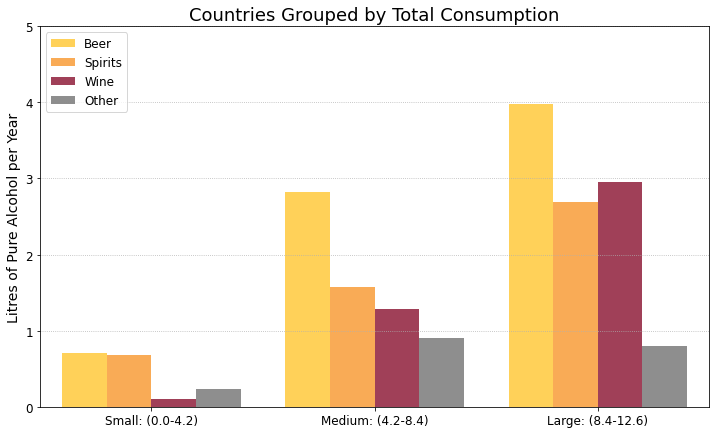

In [19]:
# Setting the positions and width for the bars
pos = list(range(len(group_avg_df['Count of Countries'])))
width = 0.2

# plot bars
fig, ax = plt.subplots(figsize=(12,7))
plt.bar(pos, 
        group_avg_df['Average Beer'], 
        width,
        alpha=0.75, 
        color='#FFC222',
        label=group_avg_df['Groups by Total Consumption'][0]) 

plt.bar([p + width for p in pos], 
        group_avg_df['Average Spirits'],
        width, 
        alpha=0.75, 
        color='#F78F1E', 
        label=group_avg_df['Groups by Total Consumption'][1]) 

plt.bar([p + width*2 for p in pos], 
        group_avg_df['Average Wine'],
        width, 
        alpha=0.75, 
        color='#800020', 
        label=group_avg_df['Groups by Total Consumption'][2])

plt.bar([p + width*3 for p in pos], 
        group_avg_df['Average Other'],
        width, 
        alpha=0.75, 
        color='#696969', 
        label=group_avg_df['Groups by Total Consumption'][2]) 

# format plot
plt.ylabel('Litres of Pure Alcohol per Year', fontsize=14)
plt.title('Countries Grouped by Total Consumption', fontsize=18)
plt.xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(group_avg_df['Groups by Total Consumption'], fontsize=12)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim([0, 5])
plt.legend(['Beer', 'Spirits', 'Wine', 'Other'], loc='upper left', fontsize=12)
plt.grid(linestyle=':', axis='y')

plt.savefig('output_data/groupedbar.png')
plt.show()

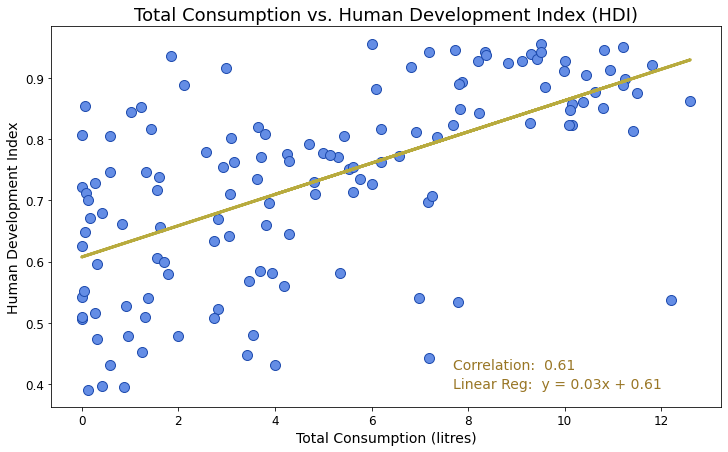

In [20]:
all_alc_x = final_results['All types']
hdi_y = final_results['HDI']

hdi_slope, hdi_int, hdi_r, hdi_p, hdi_std_err = st.linregress(all_alc_x, hdi_y)
hdi_regression = hdi_slope * all_alc_x + hdi_int
hdi_regression_txt = f'y = {str(round(hdi_slope,2))}x + {str(round(hdi_int,2))}'

plt.figure(figsize=(12, 7))
plt.scatter(all_alc_x, hdi_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(all_alc_x, hdi_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Total Consumption vs. Human Development Index (HDI)', fontsize=18)
plt.xlabel('Total Consumption (litres)', fontsize=14)
plt.ylabel('Human Development Index', fontsize=14)
plt.annotate(f'Correlation:  {round(hdi_r, 2)}', xy=(0.60, 0.1), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {hdi_regression_txt}', xy=(0.60, 0.05), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('output_data/hdi_v_all_scatter.png')
plt.show()


In [21]:
alcohol_mean = final_results[["Beer", "Wine", "Spirits", "Other"]].mean()
alcohol_mean

Beer       2.017368
Wine       1.049549
Spirits    1.361203
Other      0.548571
dtype: float64

In [22]:
avg_alltypes = final_results["All types"].mean()
avg_alltypes 

median_alltypes = final_results["All types"].median()
median_alltypes

median_beer = final_results["Beer"].median()
median_beer 

median_spirits = final_results["Spirits"].median()
median_spirits 

median_wine = final_results["Wine"].median()
median_wine

median_other = final_results["Other"].median()
median_other

0.02

In [23]:
# Alcolhol Consumption Meidan
median_alcohol_summary = pd.DataFrame(
    [{"Median Consumption - All Types" : median_alltypes,
        "Median Beer Consumption" : median_beer,
      "Median Spirit Consumption" : median_spirits,
      "Median Wine Consumption" : median_wine,
     "Median Consumption - Other": median_other}])

median_alcohol_summary

,Median Consumption - All Types,Median Beer Consumption,Median Spirit Consumption,Median Wine Consumption,Median Consumption - Other
0,4.25,1.67,1.1,0.2,0.02


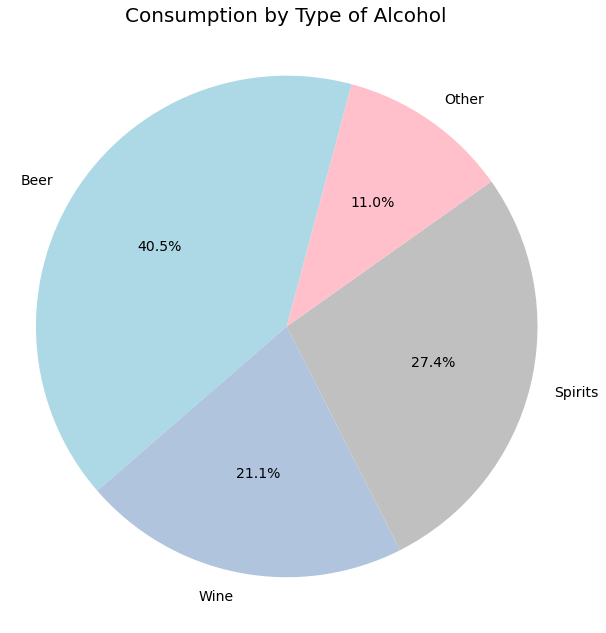

In [24]:

my_colors = ['lightblue','lightsteelblue','silver',"pink"]
plot =alcohol_mean.plot.pie(subplots=True, figsize=(10,11), colors = my_colors, startangle=75, label='', shadow = False, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title ("Consumption by Type of Alcohol", fontsize=20)
plt.axis('equal')
plt.savefig('output_data/consumption_pie.png')
plt.show()


In [25]:
# All Types

alltypesbp = final_results["All types"]
quartiles = alltypesbp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"All type potential outliers could be values below {lower_bound} and above {upper_bound} could also be outliers.")

# Beer
beerbp = final_results["Beer"]
quartiles2 = beerbp.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2= upperq2 + (1.5*iqr2)

print(f"Beer potential outliers could be values below {lower_bound2} and above {upper_bound2} could also be outliers.")

# Wine 
winebp = final_results["Wine"]
quartiles3 = winebp.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

print(f"Wine potential outliers could be values below {lower_bound3} and above {upper_bound3} could also be outliers.")

# Spirts 
spiritsbp = final_results["Spirits"]
quartiles4 = spiritsbp.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

print(f"Spirits potential outliers could be values below {lower_bound4} and above {upper_bound4} could also be outliers.")

# Other
otherbp= final_results["Other"]
quartiles5 = otherbp.quantile([.25,.5,.75])
lowerq5 = quartiles5[0.25]
upperq5 = quartiles5[0.75]
iqr5 = upperq5-lowerq5

lower_bound5 = lowerq5 - (1.5*iqr5)
upper_bound5 = upperq5 + (1.5*iqr5)

print(f"Other potential outliers could be values below {lower_bound5} and above {upper_bound5} could also be outliers.")

All type potential outliers could be values below -7.859999999999998 and above 17.259999999999998 could also be outliers.
Beer potential outliers could be values below -4.045 and above 7.915000000000001 could also be outliers.
Wine potential outliers could be values below -2.52 and above 4.279999999999999 could also be outliers.
Spirits potential outliers could be values below -2.745 and above 5.135 could also be outliers.
Other potential outliers could be values below -0.51 and above 0.8500000000000001 could also be outliers.


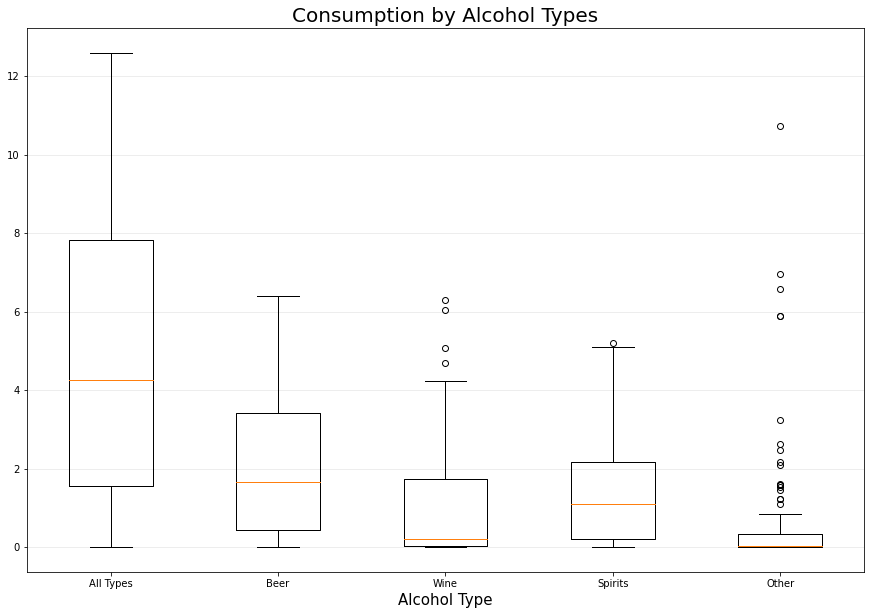

In [26]:
# Generate a box plot of the alcohol consumption of each Type 
plot_alcoholbp = [alltypesbp, beerbp, winebp, spiritsbp, otherbp]

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Consumption by Alcohol Types', fontsize=20)
ax1.set_ylabel('')
ax1.set_xlabel('Alcohol Type', fontsize=15)
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_alcoholbp, labels=["All Types","Beer","Wine","Spirits", "Other"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)

# plt.savefig("../BoxWhisker.png")


plt.savefig('output_data/Consumption_by_Alcohol_Boxplot.png')
plt.show()

In [27]:
# Sort for Top 5 countries Alcohol Consumption - All Types
top_five_countires_sort = final_results.sort_values(["All types"], ascending=False)
top_five_countires_sort.head(10)

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
38,Latvia,29942.0,37.0,0.863,75.2,53,5.933,1.148,12.60,5.30,5.10,1.40,0.80
119,Uganda,2122.0,159.0,0.538,63.0,135,4.161,0.322,12.20,0.84,0.61,0.01,10.73
11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
31,Lithuania,35390.0,34.0,0.876,75.7,50,5.952,1.197,11.49,4.47,4.75,0.80,1.46
49,Bulgaria,22181.0,56.0,0.813,74.9,100,4.933,1.054,11.42,4.32,5.20,1.73,0.16
22,France,45561.0,26.0,0.898,82.5,23,6.489,1.293,11.24,2.43,2.35,6.29,0.17
3,Ireland,83471.0,2.0,0.951,82.1,14,6.977,1.448,11.20,5.12,2.32,2.90,0.85
32,Estonia,35308.0,29.0,0.889,78.6,63,5.739,1.200,11.20,3.58,4.62,1.89,1.11
0,Luxembourg,114110.0,23.0,0.913,82.1,17,6.910,1.576,10.94,4.03,2.21,4.70,0.00
12,Germany,53660.0,6.0,0.946,81.2,15,6.965,1.340,10.81,5.64,2.07,3.11,0.00


In [28]:
top_five_countires_sort = top_five_countires_sort.iloc[0:5,:]
top_five_countires_sort

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
38,Latvia,29942.0,37.0,0.863,75.2,53,5.933,1.148,12.60,5.30,5.10,1.40,0.80
119,Uganda,2122.0,159.0,0.538,63.0,135,4.161,0.322,12.20,0.84,0.61,0.01,10.73
11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
31,Lithuania,35390.0,34.0,0.876,75.7,50,5.952,1.197,11.49,4.47,4.75,0.80,1.46
49,Bulgaria,22181.0,56.0,0.813,74.9,100,4.933,1.054,11.42,4.32,5.20,1.73,0.16


In [29]:
# Sort for Bottom 5 countries Alcohol Consumption - All Types
Bottom_ten_countires_sort = final_results.sort_values(["All types"], ascending=True)
Bottom_ten_countires_sort.head(10)

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
100,Mauritania,5042.0,157.0,0.542,64.7,126,4.356,0.557,0.00,0.00,0.00,0.00,0.0
103,Bangladesh,4441.0,133.0,0.625,72.3,115,4.500,0.532,0.00,0.00,0.00,0.00,0.0
61,Libya,15018.0,105.0,0.721,72.7,70,5.566,0.985,0.01,0.00,0.00,0.01,0.0
105,Sudan,4161.0,170.0,0.506,65.1,137,4.139,0.605,0.01,0.00,0.01,0.00,0.0
15,Kuwait,50479.0,64.0,0.807,75.4,45,6.083,1.474,0.01,0.00,0.01,0.00,0.0
117,Afghanistan,2190.0,169.0,0.509,64.5,145,3.632,0.332,0.01,0.00,0.01,0.00,0.0
102,Pakistan,4740.0,154.0,0.552,67.1,75,5.472,0.652,0.05,0.00,0.04,0.00,0.0
81,Bhutan,11345.0,129.0,0.649,71.5,97,5.082,0.796,0.06,0.01,0.00,0.05,0.0
19,Saudi Arabia,47597.0,40.0,0.854,75.0,33,6.371,1.379,0.07,0.00,0.07,0.00,0.0
79,Indonesia,11372.0,107.0,0.712,71.5,96,5.093,0.899,0.08,0.06,0.01,0.00,0.0


In [30]:
Bottom_ten_countires_sort = Bottom_ten_countires_sort.iloc[0:5,:]
Bottom_ten_countires_sort

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
100,Mauritania,5042.0,157.0,0.542,64.7,126,4.356,0.557,0.00,0.0,0.00,0.00,0.0
103,Bangladesh,4441.0,133.0,0.625,72.3,115,4.500,0.532,0.00,0.0,0.00,0.00,0.0
61,Libya,15018.0,105.0,0.721,72.7,70,5.566,0.985,0.01,0.0,0.00,0.01,0.0
105,Sudan,4161.0,170.0,0.506,65.1,137,4.139,0.605,0.01,0.0,0.01,0.00,0.0
15,Kuwait,50479.0,64.0,0.807,75.4,45,6.083,1.474,0.01,0.0,0.01,0.00,0.0


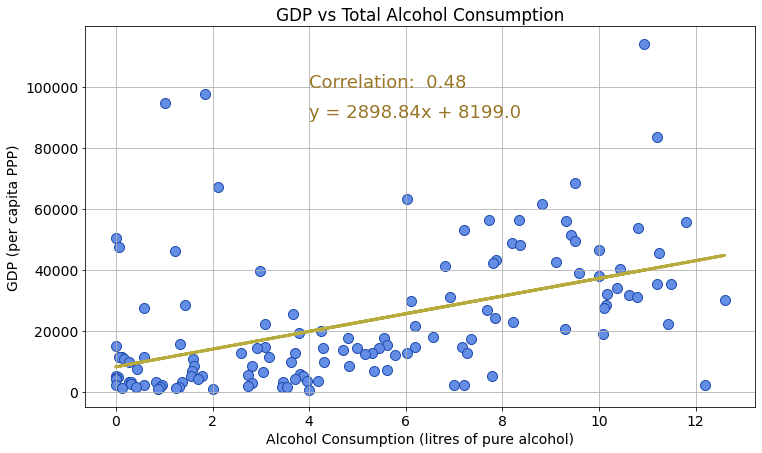

In [31]:
y_values = final_results["GDP (per capita PPP)"] 
x_values = final_results["All types"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression

plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(4, 90000),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (4, 100000), fontsize=18, color='#997625')
plt.xlabel("Alcohol Consumption (litres of pure alcohol)")
plt.ylabel("GDP (per capita PPP)")

plt.title("GDP vs Total Alcohol Consumption")
plt.grid()
plt.savefig('output_data/GDP_v_Alcohol_scatter.png')
plt.show()

The Correlation Coefficient is: 0.48376278795031524


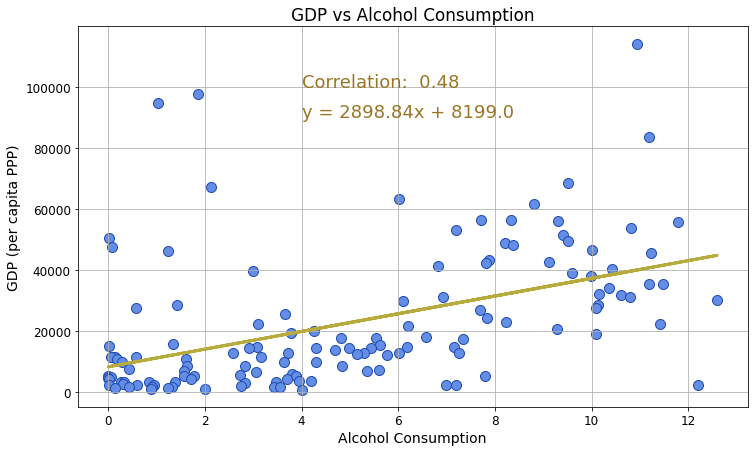

In [32]:
y_values = final_results["GDP (per capita PPP)"] 
x_values = final_results["All types"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression

plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(4, 90000),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (4, 100000), fontsize=18, color='#997625')
plt.xlabel("Alcohol Consumption")
plt.ylabel("GDP (per capita PPP)")
print(f"The Correlation Coefficient is: {rvalue}")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("GDP vs Alcohol Consumption")
plt.grid()

plt.savefig('output_data/GDP_Alcohol.png')
plt.show()

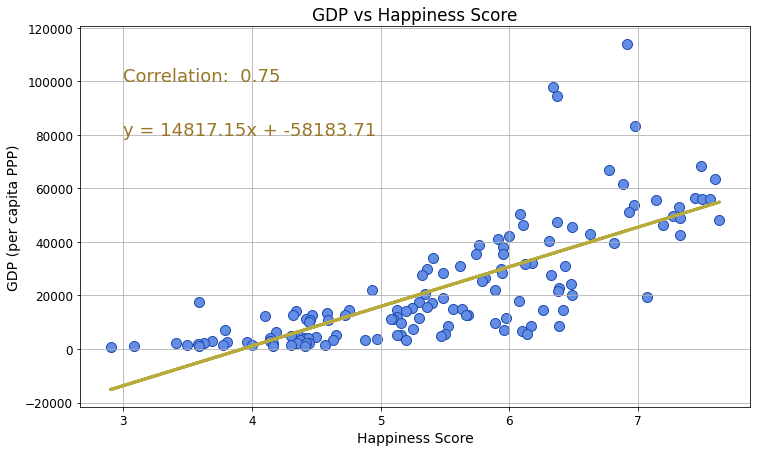

In [33]:
y_values = final_results["GDP (per capita PPP)"]
x_values = final_results["Score"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression


plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(3, 80000),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (3, 100000), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("GDP (per capita PPP)")
plt.xlabel("Happiness Score")
plt.title("GDP vs Happiness Score")
plt.grid()

plt.savefig('output_data/GDP_Happiness.png')
plt.show()

The Correlation Coefficient is: 0.478303248718126


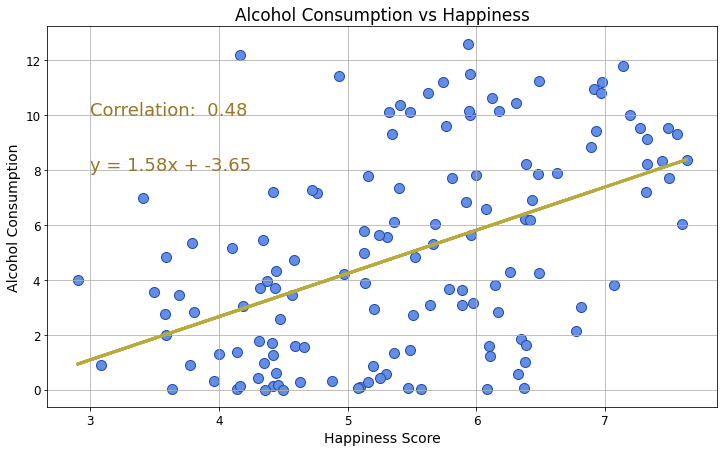

In [34]:
x_values = final_results["Score"]
y_values = final_results["All types"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(3, 8),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (3, 10), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel("Happiness Score")
plt.ylabel("Alcohol Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Alcohol Consumption vs Happiness")
plt.grid()

plt.savefig('output_data/Alcohol_Happiness.png')
plt.show()

The Correlation Coefficient is: 0.478303248718126


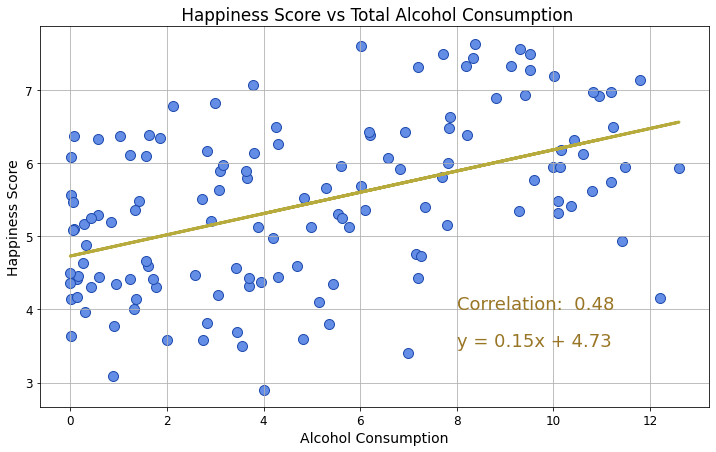

In [35]:
x_values = final_results["All types"]
y_values = final_results["Score"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(8, 3.5),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (8, 4), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Happiness Score")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title(" Happiness Score vs Total Alcohol Consumption")
plt.grid()

plt.savefig('output_data/Happiness_Alcohol.png')
plt.show()

The Correlation Coefficient is: 0.47923514019688995


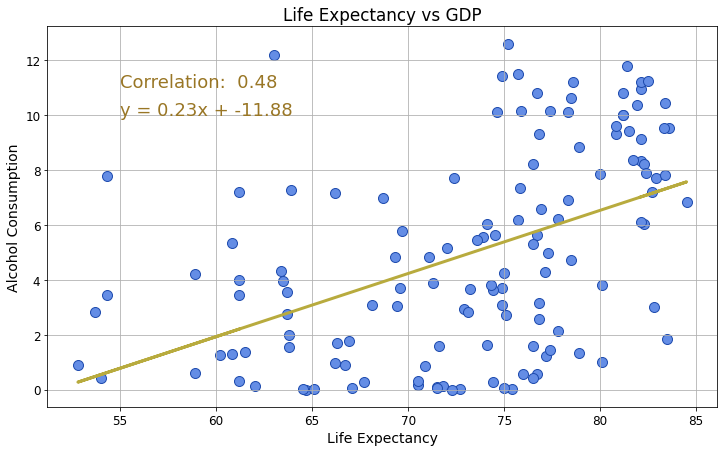

In [36]:
x_values = final_results["Life Expectancy"]
y_values = final_results["All types"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression

plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(55, 10),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (55, 11), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Life Expectancy")
plt.ylabel("Alcohol Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Life Expectancy vs GDP")
plt.grid()

plt.savefig('output_data/Life_GDP.png')
plt.show()

The Correlation Coefficient is: 0.6085130880955129


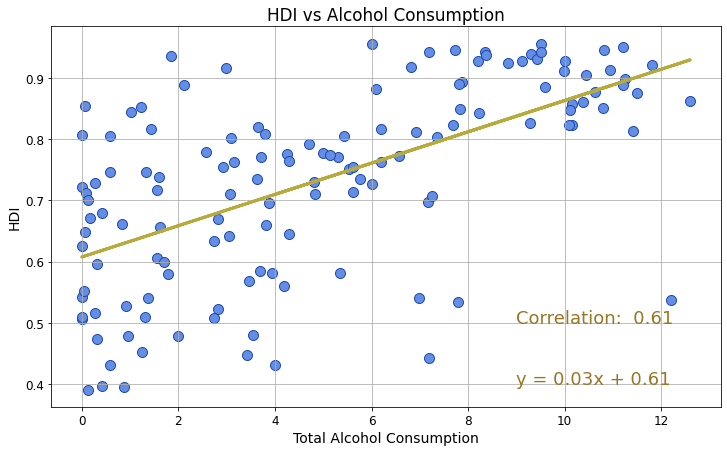

In [37]:
x_values = final_results["All types"]
y_values = final_results["HDI"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(9, .4),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (9, .5), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("HDI")
plt.xlabel("Total Alcohol Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("HDI vs Alcohol Consumption")
plt.grid()

plt.savefig('output_data/Alcohol_HDI.png')
plt.show()

In [38]:
# Steph's code resumes here:

In [39]:

# Sort for Top 5 countries Alcohol Consumption - Beer
top_five_countires_beer_sort = final_results.sort_values(["Beer"], ascending=False)
top_five_countires_beer_sort.head(10)

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
35,Poland,31766.0,35.0,0.877,78.5,42,6.123,1.176,10.62,5.90,3.88,0.85,0.00
63,Gabon,14743.0,119.0,0.697,66.2,103,4.758,1.036,7.16,5.66,0.68,0.77,0.05
12,Germany,53660.0,6.0,0.946,81.2,15,6.965,1.340,10.81,5.64,2.07,3.11,0.00
37,Panama,31049.0,57.0,0.812,78.3,27,6.430,1.112,6.92,5.42,1.24,0.25,0.02
38,Latvia,29942.0,37.0,0.863,75.2,53,5.933,1.148,12.60,5.30,5.10,1.40,0.80
40,Romania,28565.0,49.0,0.823,75.9,52,5.945,1.116,10.14,5.28,1.77,3.09,0.00
3,Ireland,83471.0,2.0,0.951,82.1,14,6.977,1.448,11.20,5.12,2.32,2.90,0.85
42,Croatia,27558.0,43.0,0.848,78.3,82,5.321,1.115,10.10,4.67,1.36,3.72,0.35
30,Slovenia,38022.0,22.0,0.912,81.2,51,5.948,1.219,9.99,4.66,1.20,4.13,0.00


In [40]:
top_five_countires_beer_sort = top_five_countires_beer_sort.iloc[0:5,:]
top_five_countires_beer_sort

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
35,Poland,31766.0,35.0,0.877,78.5,42,6.123,1.176,10.62,5.90,3.88,0.85,0.00
63,Gabon,14743.0,119.0,0.697,66.2,103,4.758,1.036,7.16,5.66,0.68,0.77,0.05
12,Germany,53660.0,6.0,0.946,81.2,15,6.965,1.340,10.81,5.64,2.07,3.11,0.00
37,Panama,31049.0,57.0,0.812,78.3,27,6.430,1.112,6.92,5.42,1.24,0.25,0.02


In [41]:
top_five_countires_beer_sort.corr()

,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
GDP (per capita PPP),1.000000,-0.920438,0.933998,0.872351,-0.887200,0.942116,0.985108,0.813851,0.520298,0.281497,0.884364,-0.834643
HDI Rank,-0.920438,1.000000,-0.995436,-0.967282,0.936180,-0.944870,-0.912219,-0.815087,-0.388637,-0.579983,-0.677804,0.972634
HDI,0.933998,-0.995436,1.000000,0.941639,-0.906392,0.927116,0.939277,0.860527,0.440651,0.582389,0.731046,-0.966417
Life Expectancy,0.872351,-0.967282,0.941639,1.000000,-0.986463,0.972029,0.824676,0.692549,0.333799,0.525704,0.553171,-0.949951
Overall rank,-0.887200,0.936180,-0.906392,-0.986463,1.000000,-0.989628,-0.819331,-0.620801,-0.295642,-0.379938,-0.572023,0.889546
Score,0.942116,-0.944870,0.927116,0.972029,-0.989628,1.000000,0.885266,0.688289,0.386370,0.341645,0.682320,-0.885393
GDP per capita,0.985108,-0.912219,0.939277,0.824676,-0.819331,0.885266,1.000000,0.884813,0.568312,0.353992,0.919418,-0.837555
All types,0.813851,-0.815087,0.860527,0.692549,-0.620801,0.688289,0.884813,1.000000,0.767234,0.641275,0.812942,-0.838769
Beer,0.520298,-0.388637,0.440651,0.333799,-0.295642,0.386370,0.568312,0.767234,1.000000,0.326598,0.662550,-0.453988
Spirits,0.281497,-0.579983,0.582389,0.525704,-0.379938,0.341645,0.353992,0.641275,0.326598,1.000000,0.087305,-0.735244


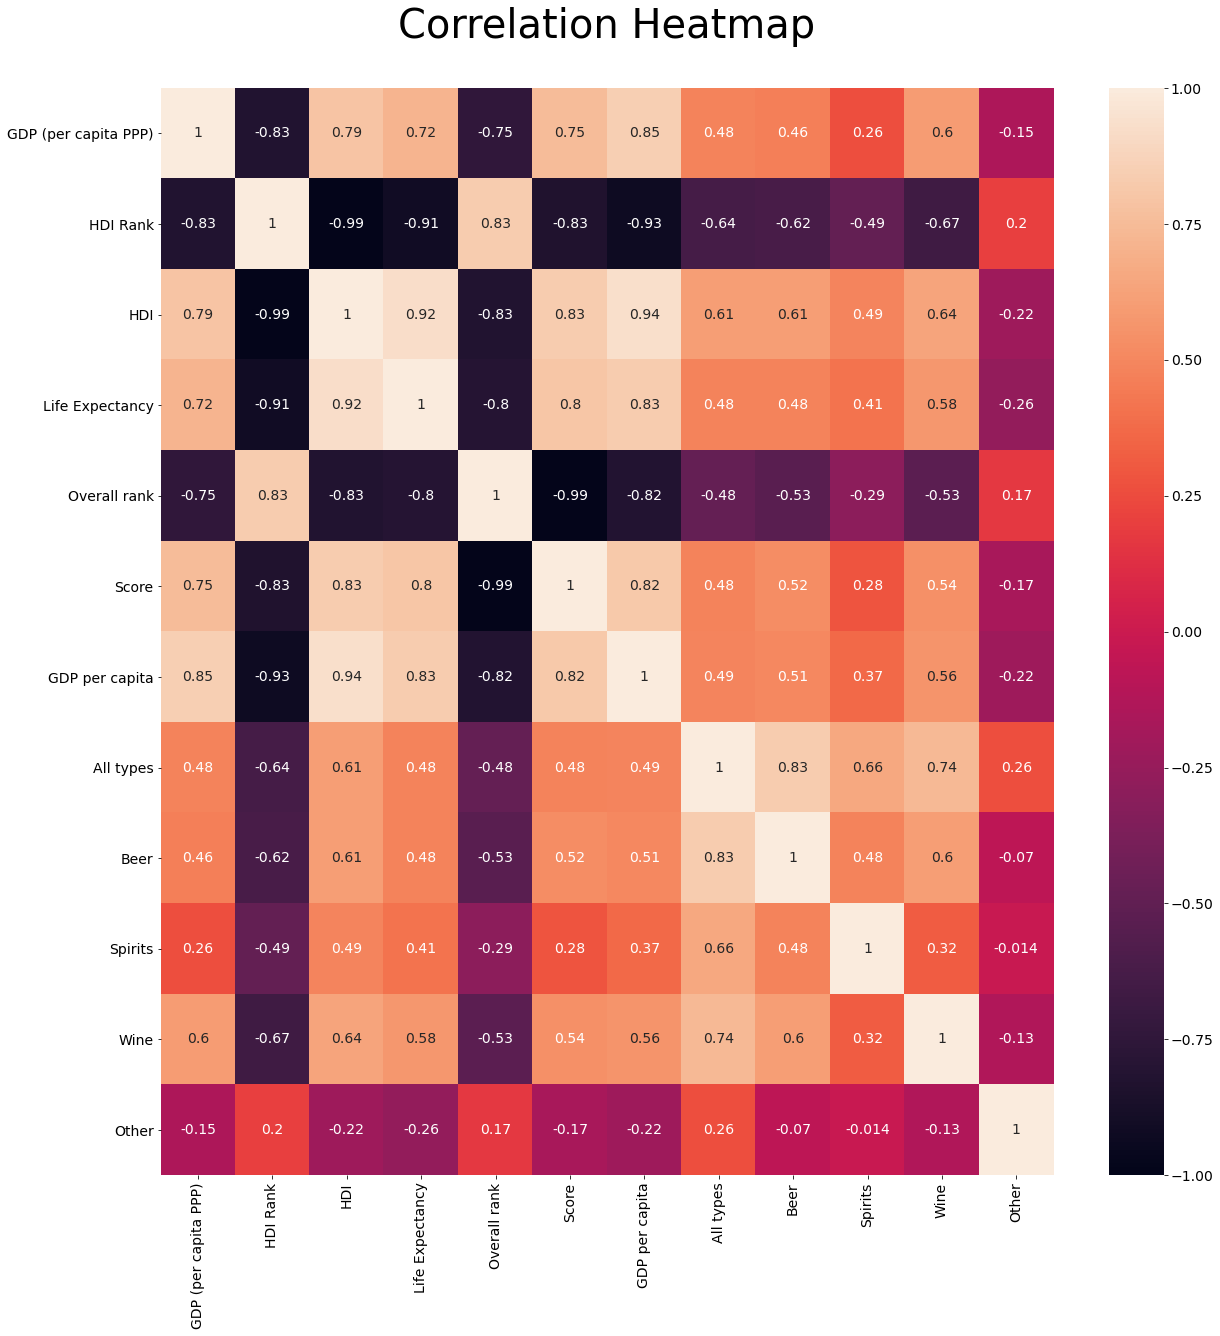

In [42]:
plt.figure(figsize=(20, 20))
heatmap =sns.heatmap(final_results.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=50)
plt.savefig('output_data/Correlation_Heatmap.png')

In [43]:
# Steph's code stops here:

In [44]:
# Beau's code resumes here:

In [45]:
happy_groups_df = final_results[['Country',
                              'All types',
                              'Score']]

# get min and max of all types
happiness_max = happy_groups_df['Score'].max()
happiness_min = happy_groups_df['Score'].min()
# print(f'max: {all_types_max}')
# print(f'min: {all_types_min}')

# find range of all types
happiness_range = happiness_max - happiness_min
# print(f'range: {all_types_range}')

# split range into 3 even groups using an increment
happiness_bin_increments = happiness_range / 3
# print(f'increments: {all_types_bin_increments}')

# create all types bins
happiness_bins = [happiness_min,
               happiness_min + happiness_bin_increments,
               happiness_min + (happiness_bin_increments * 2),
               happiness_max]
# print(all_types_bins)

# turn bin increments into strings for labels
hap_bin_str_min = str(round(happiness_min, 2))
hap_bin_str_1 = str(round(happiness_min, 2) + round(happiness_bin_increments, 2))
hap_bin_str_2 = str(round(happiness_min, 2) + round((happiness_bin_increments * 2), 2))
hap_bin_str_max = str(round(happiness_max, 2))

# create bin labels
happiness_bin_labels = [f'Small: ({hap_bin_str_min}-{hap_bin_str_1})',
                        f'Medium: ({hap_bin_str_1}-{hap_bin_str_2})',
                        f'Large: ({hap_bin_str_2}-{hap_bin_str_max})']
# print(happiness_bin_labels)

# name bin and separate rows into bins
happy_groups_df['Groups by Happiness Score'] = pd.cut(happy_groups_df['Score'],happiness_bins, labels=happiness_bin_labels, include_lowest=True)
# happy_groups_df

# create group by bin
happy_groups_df = happy_groups_df.groupby('Groups by Happiness Score')
# happy_groups_df.count()

# calculate averages by category
happy_group_country_count = happy_groups_df['Country'].count()
group_avg_happiness = happy_groups_df['Score'].mean()
group_avg_consumption = happy_groups_df['All types'].mean()

# create new grouped df
Happy_group_avg_df = pd.DataFrame({'Count of Countries': happy_group_country_count,
                             'Average Happiness': round(group_avg_happiness, 2),
                             'Average Consumption': round(group_avg_consumption, 2)})

Happy_group_avg_df.reset_index(inplace=True)

Happy_group_avg_df

/Users/lauragabrielson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Groups by Happiness Score,Count of Countries,Average Happiness,Average Consumption
0,Small: (2.9-4.48),36,4.04,2.75
1,Medium: (4.48-6.05),54,5.36,5.11
2,Large: (6.05-7.63),43,6.72,6.53


In [46]:
happy_groups_df = final_results[['Country',
                              'All types',
                              'Score']]

# get min and max of all types
happiness_max = happy_groups_df['Score'].max()
happiness_min = happy_groups_df['Score'].min()
# print(f'max: {all_types_max}')
# print(f'min: {all_types_min}')

# find range of all types
happiness_range = happiness_max - happiness_min
# print(f'range: {all_types_range}')

# split range into 3 even groups using an increment
happiness_bin_increments = happiness_range / 3
# print(f'increments: {all_types_bin_increments}')

# create all types bins
happiness_bins = [happiness_min,
               happiness_min + happiness_bin_increments,
               happiness_min + (happiness_bin_increments * 2),
               happiness_max]
# print(all_types_bins)

# turn bin increments into strings for labels
hap_bin_str_min = str(round(happiness_min, 2))
hap_bin_str_1 = str(round(happiness_min, 2) + round(happiness_bin_increments, 2))
hap_bin_str_2 = str(round(happiness_min, 2) + round((happiness_bin_increments * 2), 2))
hap_bin_str_max = str(round(happiness_max, 2))

# create bin labels
happiness_bin_labels = ['1', '2', '3']
# print(happiness_bin_labels)

# name bin and separate rows into bins
happy_groups_df['Groups by Happiness Score'] = pd.cut(happy_groups_df['Score'],happiness_bins, labels=happiness_bin_labels, include_lowest=True)
# happy_groups_df

# create group by bin
happy_groups_df = happy_groups_df.groupby('Groups by Happiness Score')
# happy_groups_df.count()

# calculate averages by category
happy_group_country_count = happy_groups_df['Country'].count()
group_avg_happiness = happy_groups_df['Score'].mean()
group_avg_consumption = happy_groups_df['All types'].mean()

# create new grouped df
Happy_group_avg_df = pd.DataFrame({'Count of Countries': happy_group_country_count,
                             'Average Happiness': round(group_avg_happiness, 2),
                             'Average Consumption': round(group_avg_consumption, 2)})

Happy_group_avg_df.reset_index(inplace=True)

Happy_group_avg_df

/Users/lauragabrielson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Groups by Happiness Score,Count of Countries,Average Happiness,Average Consumption
0,1,36,4.04,2.75
1,2,54,5.36,5.11
2,3,43,6.72,6.53


In [47]:


low_alcohol = final_results.loc[final_results["All types"] < 4.2]
med_alcohol = final_results.loc[final_results["All types"] >= 4.2]
med_alcohol = med_alcohol.loc[med_alcohol["All types"] <= 8.4]
top_alcohol = final_results.loc[final_results["All types"] > 8.4]



print(low_alcohol["Score"].mean())
print(med_alcohol["Score"].mean())
print(top_alcohol["Score"].mean())


4.955333333333334
5.686512820512822
6.2600357142857135


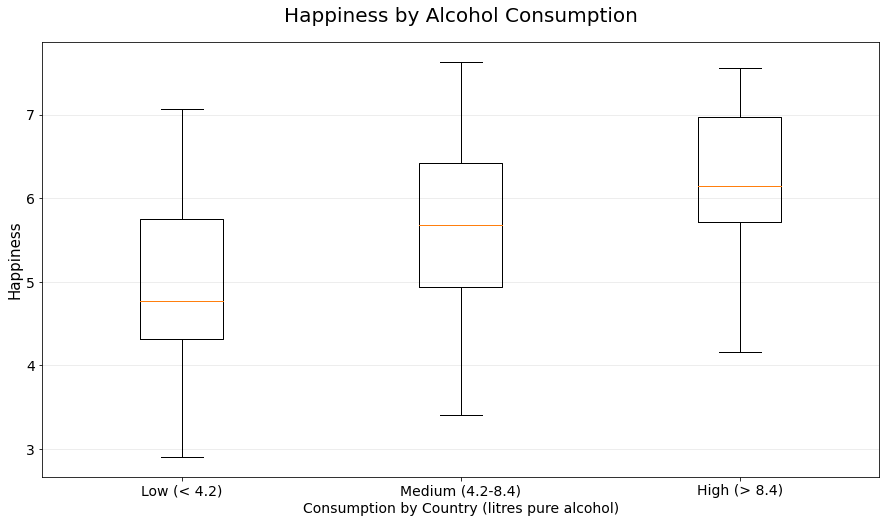

In [48]:


plot_final = [low_alcohol["Score"], med_alcohol["Score"], top_alcohol["Score"]]

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Happiness by Alcohol Consumption', fontsize=20, pad=20)
ax1.set_xlabel('Consumption by Country (litres pure alcohol)')
ax1.set_ylabel('Happiness', fontsize=15)
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_final, labels=["Low (< 4.2)","Medium (4.2-8.4)","High (> 8.4)"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)

# plt.savefig("../BoxWhisker.png")


plt.savefig('output_data/Happiness_Alcohol_boxplot.png')
plt.show()

In [49]:
st.f_oneway(low_alcohol["Score"], med_alcohol["Score"], top_alcohol["Score"])

F_onewayResult(statistic=18.12645031514893, pvalue=1.1384602477879347e-07)

In [50]:
# compare low to med, med to high and low to high
st.f_oneway(med_alcohol["Score"], top_alcohol["Score"])

F_onewayResult(statistic=5.049884148563456, pvalue=0.028028871858433866)

In [51]:
st.f_oneway(low_alcohol["Score"], med_alcohol["Score"])

F_onewayResult(statistic=12.080945148147274, pvalue=0.0007469652455247747)

In [52]:
st.f_oneway(low_alcohol["Score"], top_alcohol["Score"])

F_onewayResult(statistic=37.33678861586203, pvalue=2.3602037390507875e-08)

In [53]:
# Beau's code stops here:

In [54]:
# Laura's code resumes here:

The Correlation Coefficient is: 0.540040198919557


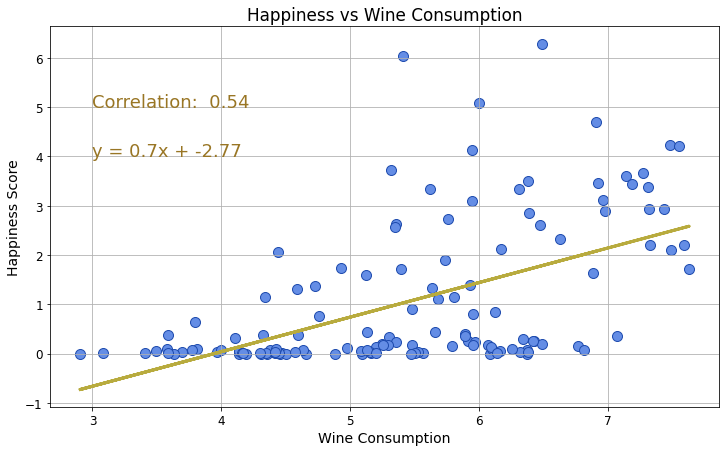

In [55]:
x_values = final_results["Score"]
y_values = final_results["Wine"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(3, 4),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (3, 5), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Happiness Score")
plt.xlabel("Wine Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Happiness vs Wine Consumption")
plt.grid()

plt.savefig('output_data/Wine_Happiness.png')
plt.show()

The Correlation Coefficient is: 0.5248554381205626


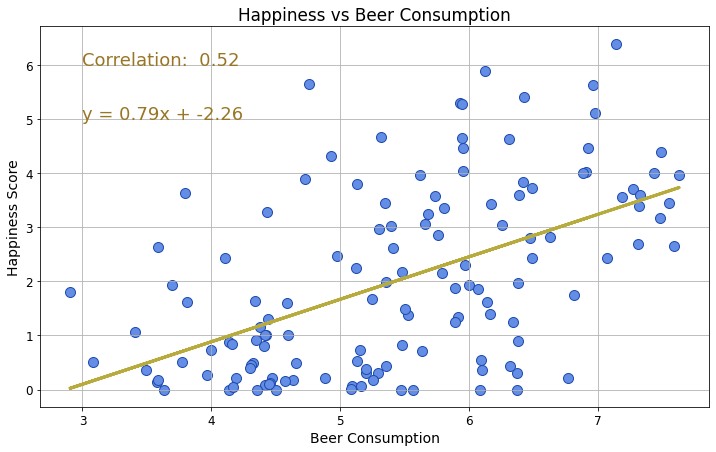

In [56]:
x_values = final_results["Score"]
y_values = final_results["Beer"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(3, 5),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (3, 6), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Happiness Score")
plt.xlabel("Beer Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Happiness vs Beer Consumption")
plt.grid()

plt.savefig('output_data/Beer_Happiness.png')
plt.show()

The Correlation Coefficient is: 0.2843486820772493


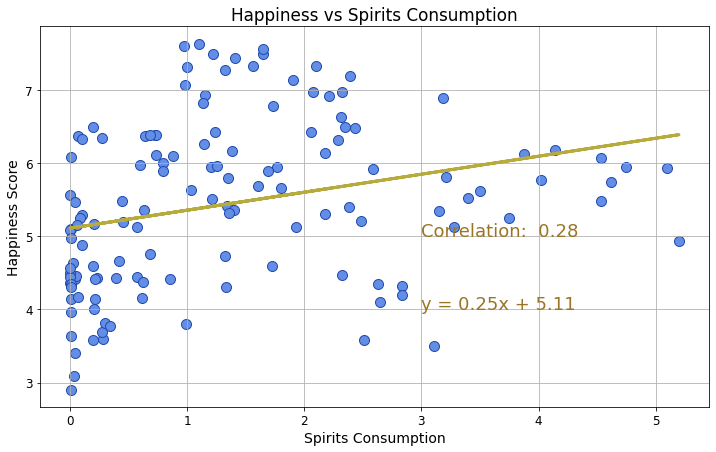

In [57]:
y_values = final_results["Score"]
x_values = final_results["Spirits"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(3, 4),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (3, 5), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Happiness Score")
plt.xlabel("Spirits Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Happiness vs Spirits Consumption")
plt.grid()

plt.savefig('output_data/Spirits_Happiness.png')
plt.show()

The Correlation Coefficient is: -0.1690958872687673


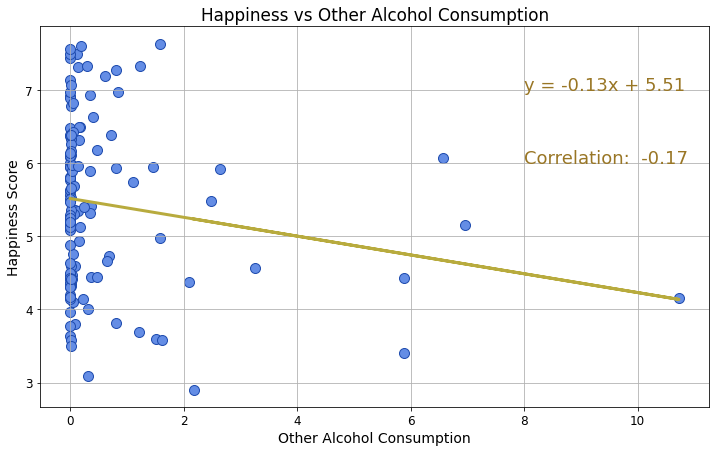

In [58]:
y_values = final_results["Score"]
x_values = final_results["Other"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(8, 7),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (8, 6), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Happiness Score")
plt.xlabel("Other Alcohol Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Happiness vs Other Alcohol Consumption")
plt.grid()

plt.savefig('output_data/Other_Alcohol_Happiness.png')
plt.show()

In [59]:
# Laura's code stops here:

In [60]:
# Nick's code resumes here:

In [61]:
# Nick's code stops here: